In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
# load data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
#checking

print train_data.shape
train_data.head(10)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#checking

print test_data.shape
test_data.head(10)

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# splitting the dataset into training-data, cross_validation-data and testing-data

from sklearn.cross_validation import train_test_split    
X, X_test, y, y_test = train_test_split(train_data.iloc[:,1:], train_data['label'].values, test_size=0.2, random_state=2)
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=2)

In [6]:
#checking
print 'X_train', X_train.shape
print 'y_train', y_train.shape
print 'X_cv', X_cv.shape
print 'y_cv', y_cv.shape
print 'X_test', X_test.shape
print 'y_test', y_test.shape

X_train (26880, 784)
y_train (26880,)
X_cv (6720, 784)
y_cv (6720,)
X_test (8400, 784)
y_test (8400,)


In [7]:
#defining a function that displays the images (6 images per line)
def display_img(data, index):
    l = np.ceil(len(index)/6.0)
    plt.figure()
    j = 1
    for i in index :
        plt.subplot(l,6,j)
        plt.axis('off')
        plt.imshow(data.iloc[i,:].values.reshape(28,28), cmap='Greys') #load
        j+=1
    plt.show()  # show the window

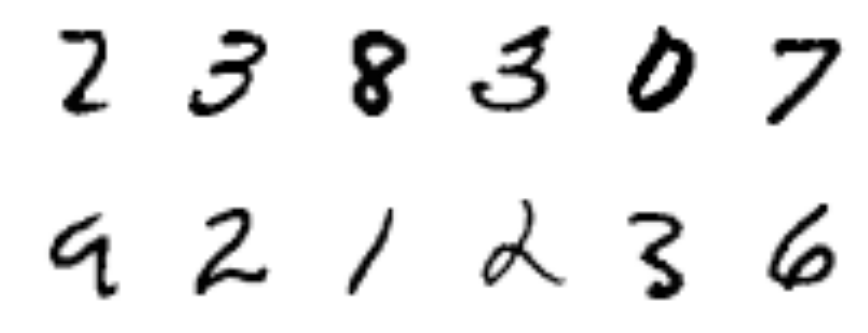

In [8]:
#checking
display_img(X, [2,6,8,22,699,332,459,211,96,589,669,222])

In [9]:
#scaling the data : from [0,255] to [0,1]

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_std = min_max_scaler.transform(X_train)
X_cv_std = min_max_scaler.transform(X_cv)
X_test_std = min_max_scaler.transform(X_test)

In [10]:
# Using the Keras library to implement a neural network model

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2, activity_l2


Using TensorFlow backend.


In [11]:
# Building a neural network with 3 hidden layers 
model = Sequential()
model.add(Dense(12, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(24))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True), metrics=['accuracy'])

In [13]:
# transforming label integers into binary vectors

from keras.utils import np_utils

y_train_bin = np_utils.to_categorical(y_train)
y_cv_bin = np_utils.to_categorical(y_cv)
y_test_bin = np_utils.to_categorical(y_test)

In [14]:
# training the model

model.fit(X_train_std, y_train_bin)

Epoch 1/10
26880/26880 [==============================] - 3s - loss: 0.6526 - acc: 0.7943     
Epoch 2/10
26880/26880 [==============================] - 2s - loss: 0.3237 - acc: 0.9051     
Epoch 3/10
26880/26880 [==============================] - 2s - loss: 0.2712 - acc: 0.9191     
Epoch 4/10
26880/26880 [==============================] - 1s - loss: 0.2407 - acc: 0.9296     
Epoch 5/10
26880/26880 [==============================] - 1s - loss: 0.2226 - acc: 0.9332     
Epoch 6/10
26880/26880 [==============================] - 1s - loss: 0.2104 - acc: 0.9377     
Epoch 7/10
26880/26880 [==============================] - 1s - loss: 0.1964 - acc: 0.9422     
Epoch 8/10
26880/26880 [==============================] - 1s - loss: 0.1916 - acc: 0.9435     
Epoch 9/10
26880/26880 [==============================] - 1s - loss: 0.1829 - acc: 0.9448     
Epoch 10/10
26880/26880 [==============================] - 2s - loss: 0.1779 - acc: 0.9457     


In [15]:
# evaluating the model

loss_and_metrics = model.evaluate(X_cv_std, y_cv_bin)
print "\n accuracy = ", loss_and_metrics[1]

6432/6720 [===========================>..] - ETA: 0s
 accuracy =  0.934375


Not a good accuracy !

In [16]:
# Building a convolutional neural network :

from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Flatten

conv_model = Sequential()
conv_model.add(Convolution2D(60, 5, 5, border_mode="same",input_shape=(28, 28, 1)))
conv_model.add(Activation("relu"))
conv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
conv_model.add(Convolution2D(40, 3, 3, border_mode="same"))
conv_model.add(Activation("relu"))
conv_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))
conv_model.add(Flatten())
conv_model.add(Dense(400))
conv_model.add(Activation("relu"))
model.add(Dropout(0.5))
 # softmax classifier
conv_model.add(Dense(10))
conv_model.add(Activation("softmax"))

In [17]:
conv_model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True), metrics=['accuracy'])

In [18]:
# Reshaping the data 

X_train_std = X_train_std.reshape((X_train_std.shape[0], 28, 28))
X_cv_std = X_cv_std.reshape((X_cv_std.shape[0], 28, 28))
X_test_std = X_test_std.reshape((X_test_std.shape[0], 28, 28))

X_train_std = X_train_std[:, :, :, np.newaxis]
X_cv_std = X_cv_std[:, :, :, np.newaxis]
X_test_std = X_test_std[:, :, :, np.newaxis]

In [19]:
# Training the data
conv_model.fit(X_train_std, y_train_bin)

Epoch 1/10
26880/26880 [==============================] - 60s - loss: 0.2758 - acc: 0.9125    
Epoch 2/10
26880/26880 [==============================] - 66s - loss: 0.0632 - acc: 0.9811    
Epoch 3/10
26880/26880 [==============================] - 65s - loss: 0.0418 - acc: 0.9863    
Epoch 4/10
26880/26880 [==============================] - 61s - loss: 0.0321 - acc: 0.9890    
Epoch 5/10
26880/26880 [==============================] - 56s - loss: 0.0237 - acc: 0.9924    
Epoch 6/10
26880/26880 [==============================] - 54s - loss: 0.0189 - acc: 0.9942    
Epoch 7/10
26880/26880 [==============================] - 56s - loss: 0.0150 - acc: 0.9951    
Epoch 8/10
26880/26880 [==============================] - 54s - loss: 0.0119 - acc: 0.9962    
Epoch 9/10
26880/26880 [==============================] - 56s - loss: 0.0096 - acc: 0.9971    
Epoch 10/10
26880/26880 [==============================] - 58s - loss: 0.0059 - acc: 0.9983    


In [20]:
# evaluating on the cross_validation data

loss_and_metrics = conv_model.evaluate(X_cv_std, y_cv_bin)
print "accuracy : ", loss_and_metrics[1]

6720/6720 [==============================] - 6s     
accuracy :  0.986160714286


Not bad!

In [21]:

#Evaluating on the test data
loss_and_metrics = conv_model.evaluate(X_test_std, y_test_bin)
print "accuracy: ", loss_and_metrics[1]

8400/8400 [==============================] - 8s     
accuracy:  0.988095238095


8400/8400 [==============================] - 9s     


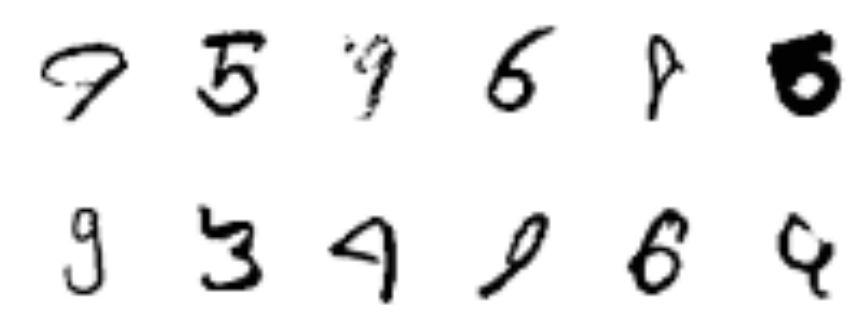

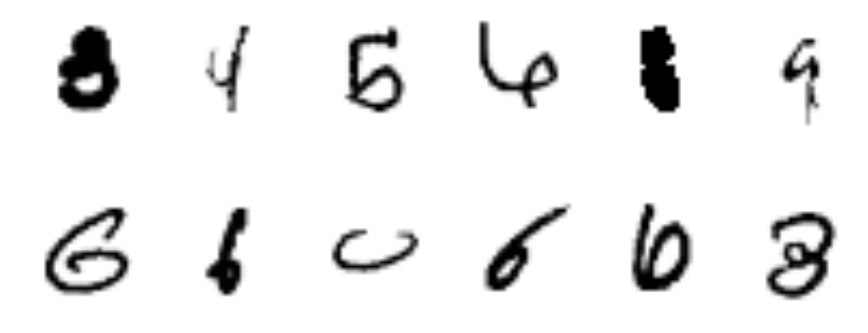

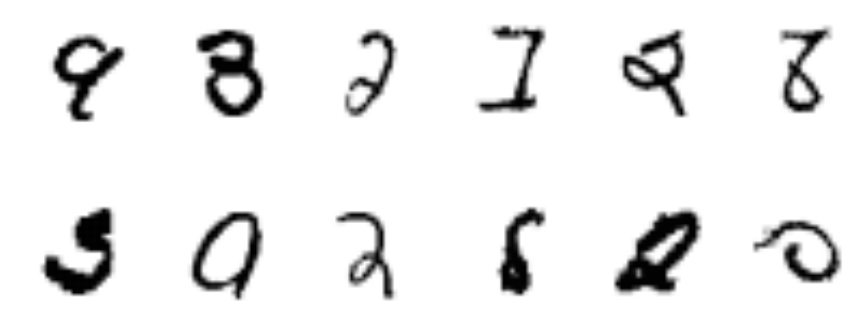

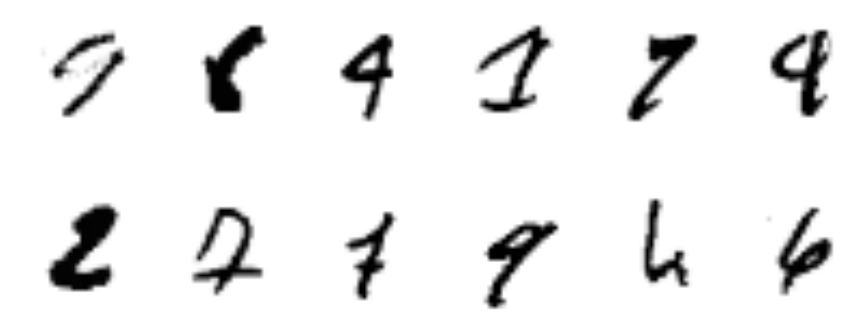

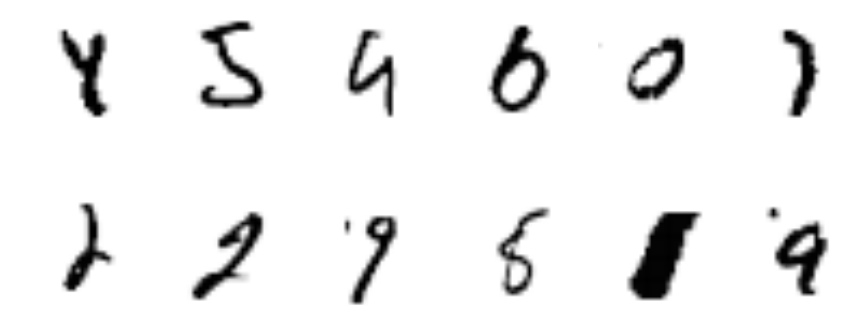

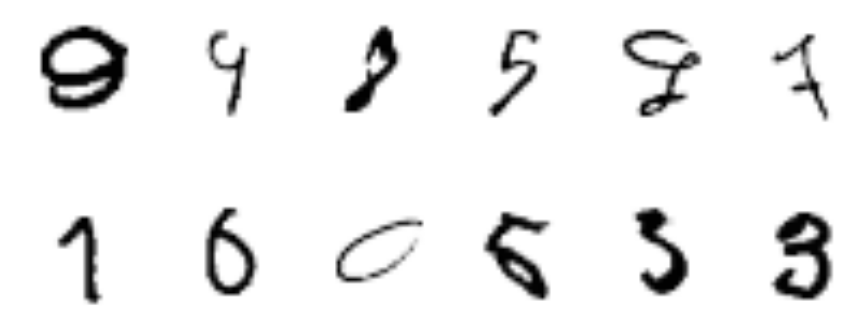

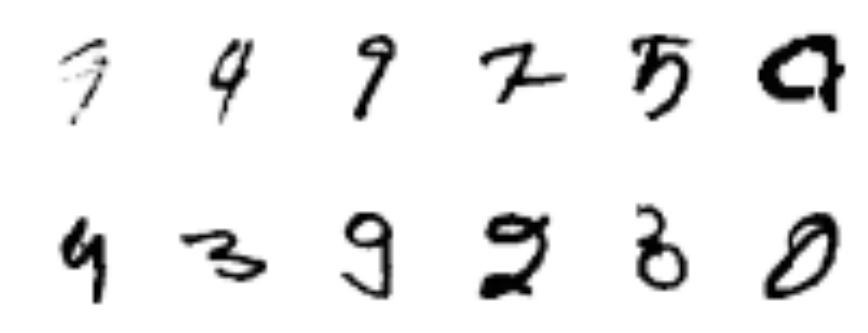

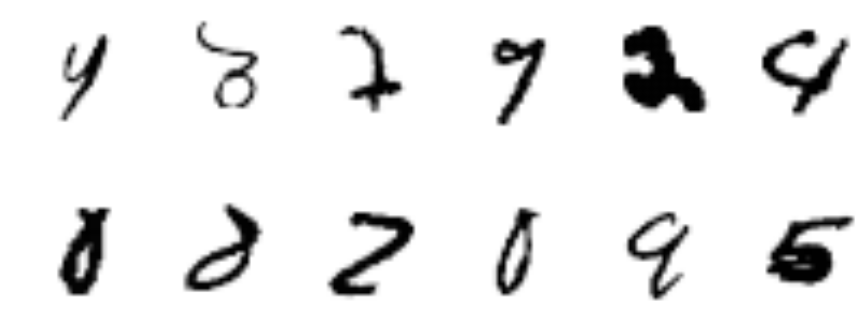

In [22]:
#making prediction and visualizing the wrong predictions 
predictions = conv_model.predict_classes(X_test_std)
error_index = []
for i in range(y_test.shape[0]):
    if y_test[i] != predictions[i]:
        error_index.append(i)
for j in range(len(error_index)/12):        
    display_img(X_test,error_index[12*j:12*(j+1)])    

In [23]:
# making submission to kaggle

# preparing the submission data for training
test_data_std = min_max_scaler.transform(test_data)
test_data_std  = test_data_std .reshape((test_data_std .shape[0], 28, 28))
test_data_std  = test_data_std [:, :, :, np.newaxis]

# making predictions
subm_predictions = conv_model.predict_classes(test_data_std)

#making submission
submission = pd.DataFrame({
        "ImageId": range(1,test_data.shape[0]+1),
        "label": subm_predictions
    })

#exporting to csv file
submission.to_csv("digit_recog_medrah_solution.csv", index=False)

28000/28000 [==============================] - 28s    


In [24]:
submission

,ImageId,label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
